Streaming output truncated to the last 5000 lines.
=== Gen 449 best solutions ===
(0.26818894702977786, (8.887763367641716, 8.813432361217501, -54.25279807029844))
=== Gen 450 best solutions ===
(5.046079639490199, (8.83505151947105, 8.795854088977858, -53.43323503136023))
=== Gen 451 best solutions ===
(1.6851865613569368, (8.869538154621518, 8.82519830658427, -54.02104793525832))
=== Gen 452 best solutions ===
(0.2704471273689743, (8.87592042495961, 8.878620627222443, -54.263792738118596))
=== Gen 453 best solutions ===
(0.8667864859744638, (8.90307403595857, 8.748698136694248, -54.43566190489889))
=== Gen 454 best solutions ===
(3.148119354470526, (8.813436540901467, 8.916158994271864, -53.30837162467254))
=== Gen 455 best solutions ===
(0.27372168961605675, (8.880322845802871, 9.012139506993813, -54.49039188738853))
=== Gen 456 best solutions ===
(1.2759723978631206, (8.9046642141898, 8.965733043032904, -54.84122962281649))
=== Gen 457 best solutions ===
(0.3659184837519935, (8.848

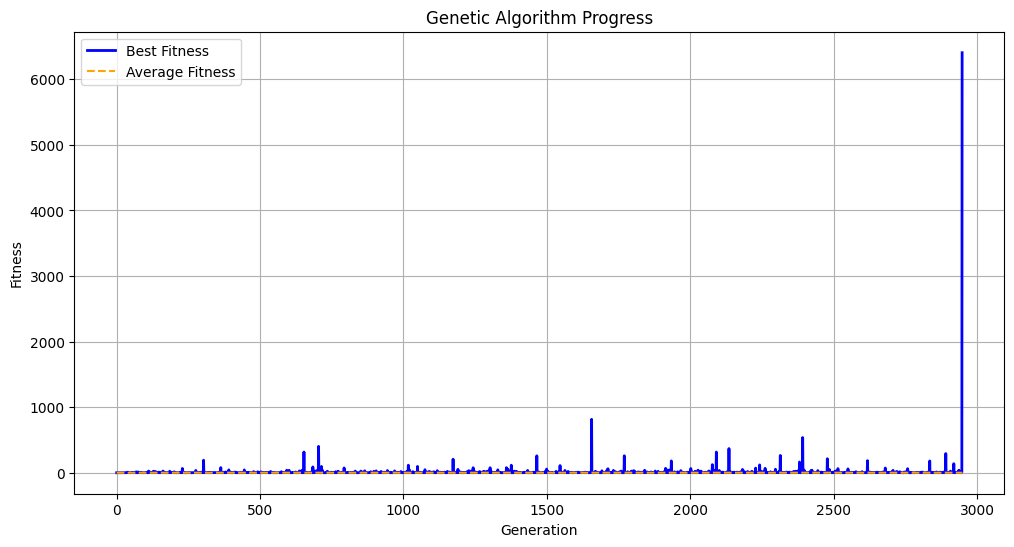

In [4]:
import random
import matplotlib.pyplot as plt

# Define an arbitrary mathematical function that we'll optimize.
def function1(x, y, z):
    return 6*x**3 + 9*y**2 + 90*z - 25  # Example polynomial function.

# Define a fitness function to evaluate how close we are to the optimal solution.
def fitness1(x, y, z):
    ans = function1(x, y, z)
    if ans == 0:  # If the result of the function is zero, it is considered the best possible solution.
        return 99999  # Assign a very high fitness score to this perfect solution.
    else:
        return abs(1 / ans)  # Otherwise, assign a fitness score inversely proportional to the result.

# Create the initial pool of potential solutions.
solutions = []
for s in range(1000):  # Generate 1000 random solutions.
    solutions.append((
        random.uniform(-10000, 10000),  # Random value for x within [0, 10000].
        random.uniform(-10000, 10000),  # Random value for y within [0, 10000].
        random.uniform(-10000, 10000)   # Random value for z within [0, 10000].
    ))

# To visualize the progress of the algorithm
best_fitness = []  # Stores the fitness of the best solution in each generation.
average_fitness = []  # Stores the average fitness of the population in each generation.

# Evolve the solutions over 10,000 generations or until a stopping criterion is met.
for i in range(10000):
    rankedsolutions = []
    for s in solutions:
        # Calculate the fitness score for each solution.
        rankedsolutions.append((fitness1(s[0], s[1], s[2]), s))

    # Sort solutions by fitness score in descending order (best solutions first).
    rankedsolutions.sort()
    rankedsolutions.reverse()

    # Track the best and average fitness scores.
    best_fitness.append(rankedsolutions[0][0])
    average_fitness.append(sum(r[0] for r in rankedsolutions) / len(rankedsolutions))

    # Print the best solution of the current generation.
    print(f'=== Gen {i} best solutions ===')
    print(rankedsolutions[0])  # The first element is the best solution.

    # Stop if the fitness score of the best solution exceeds 999.
    if rankedsolutions[0][0] > 999:
        break

    # Select the top 100 solutions to act as "parents" for the next generation.
    bestsolutions = rankedsolutions[:100]

    # Extract the individual elements (x, y, z) from the top solutions for breeding.
    elements = []
    for s in bestsolutions:
        elements.append(s[1][0])  # Collect x values.
        elements.append(s[1][1])  # Collect y values.
        elements.append(s[1][2])  # Collect z values.

    # Create the next generation by combining and slightly mutating the elements.
    newGen = []
    for _ in range(1000):  # Generate 1000 new solutions.
        e1 = random.choice(elements) * random.uniform(0.99, 1.01)  # Small mutation for x.
        e2 = random.choice(elements) * random.uniform(0.99, 1.01)  # Small mutation for y.
        e3 = random.choice(elements) * random.uniform(0.99, 1.01)  # Small mutation for z.

        newGen.append((e1, e2, e3))  # Add the new solution to the generation.

    # Replace the old generation with the new one.
    solutions = newGen

# Visualization of the algorithm's progress.
plt.figure(figsize=(12, 6))
plt.plot(best_fitness, label='Best Fitness', color='blue', linewidth=2)
plt.plot(average_fitness, label='Average Fitness', color='orange', linestyle='--')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Genetic Algorithm Progress')
plt.legend()
plt.grid()
plt.show()